In [1]:
import os 
import urllib.request

Titanic_path = os.path.join('datasets','titanic')
download_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"

def data_downloader(url= download_url, path=Titanic_path):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv","test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print('Downloading', filename)
            urllib.request.urlretrieve(url+filename, filepath)
    print("Done")
data_downloader()

Done


In [43]:
import pandas as pd 
import numpy as np
def reader(filename, path=Titanic_path):
    csv_path = os.path.join(path, filename)
    return pd.read_csv(csv_path)

In [3]:
train = reader("train.csv")
test = reader("test.csv")

In [4]:
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train = train.set_index("PassengerId")
test = test.set_index("PassengerId")

In [6]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
train.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [9]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
train["AgeBucket"] = train["Age"] // 15 * 15
train[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

train["Relatives"] = train["SibSp"]+train["Parch"]
train[["Relatives", "Survived"]].groupby(['Relatives']).mean()

,Survived
Relatives,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [14]:
# class DataframeFunctionTransformer():
#     def __init__(self, func):
#         self.func = func

#     def transform(self, input_df, **transform_params):
#         return self.func(input_df)

#     def fit(self, X, y=None, **fit_params):
#         return self
# def column_adding(train):
#     train["AgeBucket"] = train["Age"] // 15 * 15
#     train["Relatives"] = train["SibSp"]+train["Parch"]

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
cat_pipeline = Pipeline([
    ('ordinal_encoder', OrdinalEncoder()),
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse=False)),
#     ("column_adding",column_adding(train))
])

In [17]:
num_pipleline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [18]:
num_attribs = ["Age","SibSp","Parch","Fare"]
# num_attribs = ["AgeBucket","Relatives","Fare"]
cat_attribs = ["Pclass","Sex","Embarked"]

final_pipeline = ColumnTransformer([
    ("num", num_pipleline,num_attribs),
    ("cat",cat_pipeline,cat_attribs),
])

In [19]:
x_train = final_pipeline.fit_transform(train)
x_train

array([[-0.56573582,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6638609 ,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.10463705,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [20]:
y_train = train["Survived"]

In [21]:
from sklearn.ensemble import RandomForestClassifier

model_RFcl = RandomForestClassifier(n_estimators=100, random_state=42)
model_RFcl.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
from sklearn.model_selection import cross_val_score

f_score = cross_val_score(model_RFcl, x_train,y_train,cv=10)
f_score.mean()

0.8137578027465668

In [23]:
from sklearn.linear_model import LogisticRegression

model_LRcl = LogisticRegression(random_state=42)
# model_LRcl.fit(x_train, y_train)

LR_score = cross_val_score(model_LRcl, x_train,y_train,cv=10)
LR_score.mean()


0.7991260923845193

In [24]:
from sklearn.tree import DecisionTreeClassifier

model_DTcl = DecisionTreeClassifier(random_state=42)
# model_DTcl.fit(x_train,y_train)

DT_score = cross_val_score(model_DTcl, x_train,y_train,cv=10)
DT_score.mean()

0.7867790262172285

In [25]:
from sklearn.svm import SVC
model_SVC = SVC(gamma="auto")
model_SVC.fit(x_train,y_train)

SVC_score = cross_val_score(model_SVC, x_train,y_train,cv=10)
SVC_score.mean()

0.8249313358302123

Text(0, 0.5, 'Accuracy')

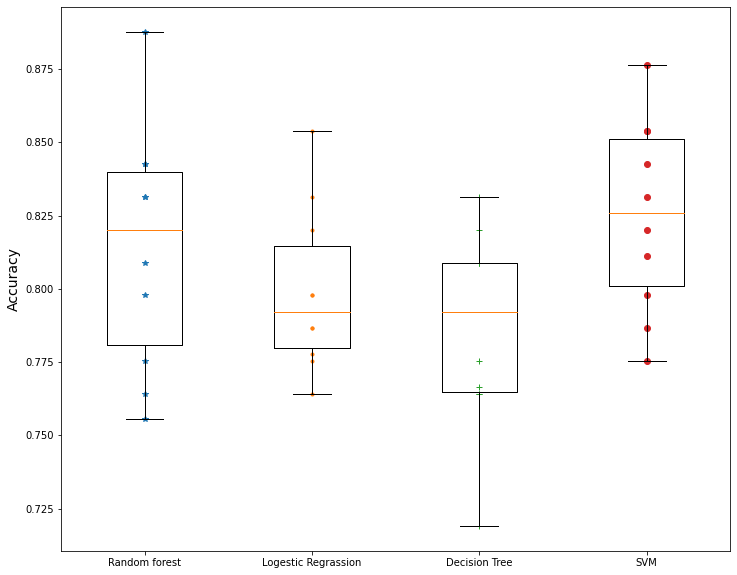

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.plot([1]*10, f_score, "*")
plt.plot([2]*10, LR_score, ".")
plt.plot([3]*10, DT_score, "+")
plt.plot([4]*10, SVC_score, "o")
plt.boxplot([f_score, LR_score, DT_score,SVC_score], labels=("Random forest","Logestic Regrassion","Decision Tree","SVM"))
plt.ylabel("Accuracy", fontsize=14)

In [45]:
def csv_writer(name):
    df = pd.DataFrame(name, columns=["Survived"])
    df.to_csv("Titanic_answere.csv",index=False)



In [46]:
x_test = final_pipeline.transform(test)
y_pred = model_SVC.predict(x_test)
csv_writer(y_pred)